# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [60]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,sem, t, norm, gaussian_kde
from statsmodels.stats.proportion import proportion_confint
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [28]:
wnba = pd.read_csv(r"C:\Users\maria\Desktop\Ironhack\Lab\Module2\Week5\M2-mini-project2\data\wnba_clean.csv")

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [ ]:
????

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [64]:
CI = t.interval(0.95,len(wnba["Weight"])-1,np.mean(wnba["Weight"]),sem(wnba["Weight"]))

In [65]:
CI

(77.15461406720749, 80.80313241166576)

**What can you say about these results?**

In [67]:
????

Object `??` not found.


**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
#unlikely

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

C:\Users\maria\Anaconda3\envs\Ironhack\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  """


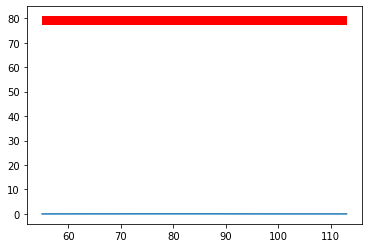

In [69]:
f, ax =plt.subplots(1, 1, sharex=True)
density = gaussian_kde(wnba["Weight"])
x_values = np.arange(wnba["Weight"].min(),wnba["Weight"].max()+1)
ax.plot(x_values,density(x_values))
ax.fill_between(x_values, density(x_values), CI[1], where= CI[0]<= CI[1], facecolor='red', interpolate=True)
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [10]:
# your answer here

In [8]:
wnba

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
138,139,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
139,140,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
140,141,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [42]:
#MEthod 2 (using metodo specific to porportions)
proportion_confint(len(wnba[wnba['FT%'] <40]), nobs = len(wnba['FT%']))

(0.009166272579290202, 0.07534076967423092)

In [52]:
#MEthod 1 (using norm)
proportion_confint(len(wnba[wnba['FT%'] <40]), nobs = len(wnba['FT%']))
p_ft = len(wnba[wnba['FT%'] <40])/len(wnba['FT%'])
varience_ft = (p_ft*(1-p_ft))/len(wnba['FT%'])
normal = norm(p_ft,np.sqrt(varience_ft))
normal.interval(0.95)

(0.009166272579290216, 0.07534076967423091)

With porpotions we usually don't need to use the t-student because we can obtain the std of population with the data we have, otherwise the solution would be: 

t.interval(0.95,len(wnba["FT%"]),p_ft,np.sqrt(p_ft*(1-p_ft)/len(wnba["FT%"])))

**What can you comment about our result? What would you tell your sister?**

In [15]:
#your-answer-here

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#your-answer-here

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [17]:
#H0: average female<=average (female+male)
claim ="average for female is higher than average of both female and male."
test1 = ttest_1samp(wnba["AST"], 52)
print(test1)

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)


In [18]:
if test1[1]<0.05:
    print("Null hypothesis rejected. There is suficient evidence to support claim that", claim)
else:
    print("Null hypothesis not rejected. Don't have enough evidence to infer on H1 ")

Null hypothesis rejected. There is suficient evidence to support claim that average for female is higher than average of both female and male.


**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [19]:
#H0: average female<=average (female+male)
claim ="average for female is higher than average of both female and male."
test1 = ttest_1samp(wnba["AST"], 52)
print(test1)#your-answer-here

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)


In [20]:
if test1[1]<0.1:
    print("Null hypothesis rejected. There is suficient evidence to support claim that", claim)
else:
    print("Null hypothesis not rejected. Don't have enough evidence to infer on H1 ")

Null hypothesis rejected. There is suficient evidence to support claim that average for female is higher than average of both female and male.


# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here